Write a Python program to calculate the betweenness centrality of nodes in a given network graph.

Implement two versions:

Using NetworkX
Without using NetworkX (Implement betweenness centrality manually using shortest paths)

Compare the results of both implementations.

(25 + 25 marks)

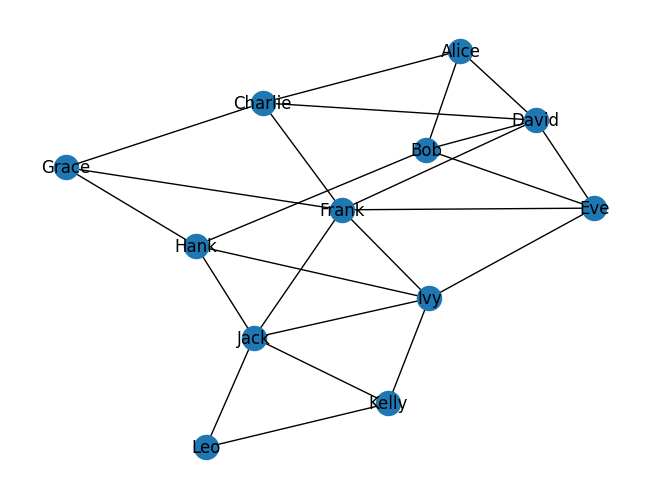

In [7]:
import networkx as nx
graph = {
    "Alice": ["Bob", "Charlie", "David"],       # Alice knows Bob, Charlie and David
    "Bob": ["Alice", "David", "Eve", "Hank"],
    "Charlie": ["Alice", "David", "Frank", "Grace"],
    "David": ["Alice", "Bob", "Charlie", "Eve", "Frank"],
    "Eve": ["Bob", "David", "Frank", "Ivy"],
    "Frank": ["Charlie", "David", "Eve", "Grace", "Ivy", "Jack"],
    "Grace": ["Charlie", "Frank", "Hank"],
    "Hank": ["Bob", "Grace", "Ivy", "Jack"],
    "Ivy": ["Eve", "Frank", "Hank", "Jack", "Kelly"],
    "Jack": ["Frank", "Hank", "Ivy", "Kelly", "Leo"],
    "Kelly": ["Ivy", "Jack", "Leo"],
    "Leo": ["Jack", "Kelly"]
}
# make graph from above list
G = nx.Graph()
for person, friends in graph.items():
    G.add_node(person)
    for friend in friends:
        G.add_edge(person, friend)
# display
nx.draw(G, with_labels=True)

In [8]:
# calculate betweenness
betweenness = nx.betweenness_centrality(G)
# sort by betweenness
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print(betweenness)
print(sorted_betweenness)

{'Alice': 0.00909090909090909, 'Bob': 0.08075757575757576, 'Charlie': 0.056666666666666664, 'David': 0.07166666666666666, 'Eve': 0.051212121212121216, 'Hank': 0.13242424242424242, 'Frank': 0.25878787878787873, 'Grace': 0.02424242424242424, 'Ivy': 0.1265151515151515, 'Jack': 0.20984848484848484, 'Kelly': 0.01515151515151515, 'Leo': 0.0}
[('Frank', 0.25878787878787873), ('Jack', 0.20984848484848484), ('Hank', 0.13242424242424242), ('Ivy', 0.1265151515151515), ('Bob', 0.08075757575757576), ('David', 0.07166666666666666), ('Charlie', 0.056666666666666664), ('Eve', 0.051212121212121216), ('Grace', 0.02424242424242424), ('Kelly', 0.01515151515151515), ('Alice', 0.00909090909090909), ('Leo', 0.0)]


In [9]:
# 2. Manual Implementation
def shortest_paths(graph, start, end):
    paths = [[start]]
    shortest_paths = []
    while paths:
        path = paths.pop(0)
        node = path[-1]
        if node == end:
            shortest_paths.append(path)
        else:
            for neighbor in graph.get(node, []):
                if neighbor not in path:
                    paths.append(path + [neighbor])
    return shortest_paths

def calculate_betweenness_centrality(graph):
    betweenness = {}
    for node in graph:
        betweenness[node] = 0

    for src in graph:
        for targ in graph:
            if src != targ:
                shortest = shortest_paths(graph, src, targ)

                if shortest:
                  # kitne shortest path hai vo calculate ho gaya
                    num_shortest_paths = len(shortest)
                    for node in graph:
                      # ab har node ko check krna hai ki vo src -> target k path me kitni baar aa rha h
                        if node != src and node != targ:
                          count = 0

                          for path in shortest:

                            if node in path:
                              count += 1
                          if count > 0:
                              betweenness[node] += count/num_shortest_paths

    for node in betweenness:
      betweenness[node] = betweenness[node] / 2 #Divide by 2 for undirected graph

    return betweenness

betweenness_centrality_manual = calculate_betweenness_centrality(graph)

print("\nBetweenness Centrality (Manual):", betweenness_centrality_manual)

max_value = max(betweenness_centrality_manual.values())
min_value = min(betweenness_centrality_manual.values())

for key, value in betweenness_centrality_manual.items():
    betweenness_centrality_manual[key] = (value - min_value) / (max_value - min_value)

# print("\nNormalized Betweenness Centrality (Manual):", betweenness_centrality_manual)
betweenness_centrality_manual = sorted(betweenness_centrality_manual.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Betweenness Centrality (Manual):", betweenness_centrality_manual)


Betweenness Centrality (Manual): {'Alice': 31.292185388479343, 'Bob': 41.693433922404914, 'Charlie': 40.811894432868996, 'David': 44.31451143953624, 'Eve': 39.09204009439888, 'Frank': 48.67677606600273, 'Grace': 31.56562324642386, 'Hank': 43.369680030857864, 'Ivy': 46.27970920410637, 'Jack': 42.546885596354414, 'Kelly': 25.659534813014442, 'Leo': 12.633778357007657}

Sorted Betweenness Centrality (Manual): [('Frank', 1.0), ('Ivy', 0.9334942425918658), ('David', 0.8789705378646177), ('Hank', 0.8527565304641572), ('Jack', 0.8299283949925589), ('Bob', 0.8062496854456971), ('Charlie', 0.7817916895638529), ('Eve', 0.7340749498976376), ('Grace', 0.5252572231163635), ('Alice', 0.517670788154649), ('Kelly', 0.36139492506074244), ('Leo', 0.0)]


In [10]:
# comparing betweenness calculated manually and networkx
print("Betweenness Centrality (NetworkX):", betweenness)
print("Betweenness Centrality (Manual):", betweenness_centrality_manual)

Betweenness Centrality (NetworkX): {'Alice': 0.00909090909090909, 'Bob': 0.08075757575757576, 'Charlie': 0.056666666666666664, 'David': 0.07166666666666666, 'Eve': 0.051212121212121216, 'Hank': 0.13242424242424242, 'Frank': 0.25878787878787873, 'Grace': 0.02424242424242424, 'Ivy': 0.1265151515151515, 'Jack': 0.20984848484848484, 'Kelly': 0.01515151515151515, 'Leo': 0.0}
Betweenness Centrality (Manual): [('Frank', 1.0), ('Ivy', 0.9334942425918658), ('David', 0.8789705378646177), ('Hank', 0.8527565304641572), ('Jack', 0.8299283949925589), ('Bob', 0.8062496854456971), ('Charlie', 0.7817916895638529), ('Eve', 0.7340749498976376), ('Grace', 0.5252572231163635), ('Alice', 0.517670788154649), ('Kelly', 0.36139492506074244), ('Leo', 0.0)]


Write a Python program to apply the Girvan-Newman Algorithm to detect communities in a given network graph.

Implement two versions:

Using NetworkX

Without using NetworkX (Manually remove edges with the highest betweenness and detect communities)

Compare the results of both implementations.

(25 + 25 marks)

In [11]:
# apply girvan-newman algo using networkX
import networkx as nx
import itertools
from collections import defaultdict

def girvan_newman_networkx(graph):
    def most_central_edge(G):
        betweenness = nx.edge_betweenness_centrality(G)
        return max(betweenness, key=betweenness.get)

    G = graph.copy()
    components = list(nx.connected_components(G))
    while len(components) == 1:
        edge_to_remove = most_central_edge(G)
        G.remove_edge(*edge_to_remove)
        components = list(nx.connected_components(G))
    return components

graph = {
    "Alice": ["Bob", "Charlie", "David"],
    "Bob": ["Alice", "David", "Eve", "Hank"],
    "Charlie": ["Alice", "David", "Frank", "Grace"],
    "David": ["Alice", "Bob", "Charlie", "Eve", "Frank"],
    "Eve": ["Bob", "David", "Frank", "Ivy"],
    "Frank": ["Charlie", "David", "Eve", "Grace", "Ivy", "Jack"],
    "Grace": ["Charlie", "Frank", "Hank"],
    "Hank": ["Bob", "Grace", "Ivy", "Jack"],
    "Ivy": ["Eve", "Frank", "Hank", "Jack", "Kelly"],
    "Jack": ["Frank", "Hank", "Ivy", "Kelly", "Leo"],
    "Kelly": ["Ivy", "Jack", "Leo"],
    "Leo": ["Jack", "Kelly"]
}

# Converting dictionary to NetworkX graph
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# NetworkX-based Girvan-Newman
nx_result = girvan_newman_networkx(G)
print("Communities detected using NetworkX:", nx_result)




Communities detected using NetworkX: [{'Bob', 'David', 'Grace', 'Frank', 'Eve', 'Charlie', 'Alice'}, {'Ivy', 'Leo', 'Jack', 'Hank', 'Kelly'}]


In [12]:
# Without uisng netowrkX
from collections import deque, defaultdict
graph = {
    "Alice": ["Bob", "Charlie", "David"],
    "Bob": ["Alice", "David", "Eve", "Hank"],
    "Charlie": ["Alice", "David", "Frank", "Grace"],
    "David": ["Alice", "Bob", "Charlie", "Eve", "Frank"],
    "Eve": ["Bob", "David", "Frank", "Ivy"],
    "Frank": ["Charlie", "David", "Eve", "Grace", "Ivy", "Jack"],
    "Grace": ["Charlie", "Frank", "Hank"],
    "Hank": ["Bob", "Grace", "Ivy", "Jack"],
    "Ivy": ["Eve", "Frank", "Hank", "Jack", "Kelly"],
    "Jack": ["Frank", "Hank", "Ivy", "Kelly", "Leo"],
    "Kelly": ["Ivy", "Jack", "Leo"],
    "Leo": ["Jack", "Kelly"]
}


def find_shortest_paths(graph, start):
    queue = deque([[start]])
    shortest_paths = {start: 1}  # Number of shortest paths to a node
    parents = defaultdict(list)  # Parent nodes in shortest paths
    levels = {start: 0}  # Track levels in BFS
    visited = set([start])

    while queue:
        path = queue.popleft()
        node = path[-1]

        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(path + [neighbor])
                levels[neighbor] = levels[node] + 1
            if levels[neighbor] == levels[node] + 1:
                parents[neighbor].append(node)
                shortest_paths[neighbor] = shortest_paths.get(neighbor, 0) + shortest_paths[node]

    return parents, shortest_paths

def calculate_edge_betweenness(graph):
    edge_betweenness = defaultdict(float)

    for node in graph:
        parents, shortest_paths = find_shortest_paths(graph, node)
        node_weights = {n: 1.0 for n in graph}  # Initialize node weights

        sorted_nodes = sorted(shortest_paths, key=lambda x: -shortest_paths[x])  # Process from leaves to root
        for node in sorted_nodes:
            if node in parents:
                weight = node_weights[node] / len(parents[node])
                for parent in parents[node]:
                    edge = tuple(sorted([node, parent]))
                    edge_betweenness[edge] += weight
                    node_weights[parent] += node_weights[node]

    return edge_betweenness

def remove_highest_betweenness_edges(graph):
    edge_betweenness = calculate_edge_betweenness(graph)
    if not edge_betweenness:
        return

    max_betweenness = max(edge_betweenness.values())
    for edge, betweenness in list(edge_betweenness.items()):
        if betweenness == max_betweenness:
            graph[edge[0]].remove(edge[1])
            graph[edge[1]].remove(edge[0])

def find_communities(graph):
    visited = set()
    communities = []

    def dfs(node, community):
        stack = [node]
        while stack:
            n = stack.pop()
            if n not in visited:
                visited.add(n)
                community.append(n)
                stack.extend(graph[n])

    for node in graph:
        if node not in visited:
            community = []
            dfs(node, community)
            communities.append(community)

    return communities

# Copy of the graph to prevent modifying the original structure
import copy
graph_copy = copy.deepcopy(graph)

# Run the Girvan-Newman Algorithm
while True:
    initial_communities = find_communities(graph_copy)
    remove_highest_betweenness_edges(graph_copy)
    new_communities = find_communities(graph_copy)

    # Stop when we detect more than one community
    if len(new_communities) > len(initial_communities):
        break

print("Detected Communities:", new_communities)


Detected Communities: [['Alice', 'David', 'Bob', 'Eve', 'Ivy', 'Jack', 'Leo', 'Kelly', 'Hank'], ['Charlie', 'Grace', 'Frank']]


In [13]:
# compare nx_result and new_communities
print("Communities detected using NetworkX:", nx_result)
print("Communities detected without using NetworkX:", new_communities)

Communities detected using NetworkX: [{'Bob', 'David', 'Grace', 'Frank', 'Eve', 'Charlie', 'Alice'}, {'Ivy', 'Leo', 'Jack', 'Hank', 'Kelly'}]
Communities detected without using NetworkX: [['Alice', 'David', 'Bob', 'Eve', 'Ivy', 'Jack', 'Leo', 'Kelly', 'Hank'], ['Charlie', 'Grace', 'Frank']]
